In [48]:
import numpy as np

array = np.array([[1,2,3],[4,5,6]])
print("Array:\n{}".format(array))

Array:
[[1 2 3]
 [4 5 6]]


In [49]:
from scipy import sparse

eye = np.eye(5)*3
print("Eye:\n{}\nArray:\n{}".format(eye,array))

Eye:
[[3. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 3.]]
Array:
[[1 2 3]
 [4 5 6]]


In [50]:
sparse_matrix = sparse.csr_matrix(eye)
print("Sparse Matrix CSR:\n{}".format(sparse_matrix))

Sparse Matrix CSR:
  (0, 0)	3.0
  (1, 1)	3.0
  (2, 2)	3.0
  (3, 3)	3.0
  (4, 4)	3.0


In [51]:
data = np.ones(4)*3
row = np.arange(4)
col = np.arange(3,-1,-1)
print(row,col)
eye_coo = sparse.coo_matrix((data, (row, col)))
print("Sparse Matrix COO:\n{}".format(eye_coo))

[0 1 2 3] [3 2 1 0]
Sparse Matrix COO:
  (0, 3)	3.0
  (1, 2)	3.0
  (2, 1)	3.0
  (3, 0)	3.0


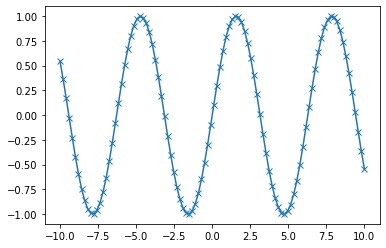

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

x=np.linspace(-10,10,100)
y=np.sin(x)
plt.plot(x,y,marker="x")

In [53]:
import pandas as pd

data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [54]:
display(data_pandas[data_pandas.Age < 30])

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13


In [55]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [56]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [57]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [58]:
print(type(iris_dataset['data']))

<class 'numpy.ndarray'>


In [59]:
print(iris_dataset['data'].shape)

(150, 4)


In [60]:
print(iris_dataset['data'][:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [113]:
print(iris_dataset['target_names'])
print(iris_dataset['feature_names'])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

In [63]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


In [65]:
iris_dataframe=pd.DataFrame(X_train,columns=iris_dataset.feature_names)
display(iris_dataframe[:5])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001992B04A208>,
      dtype=object)

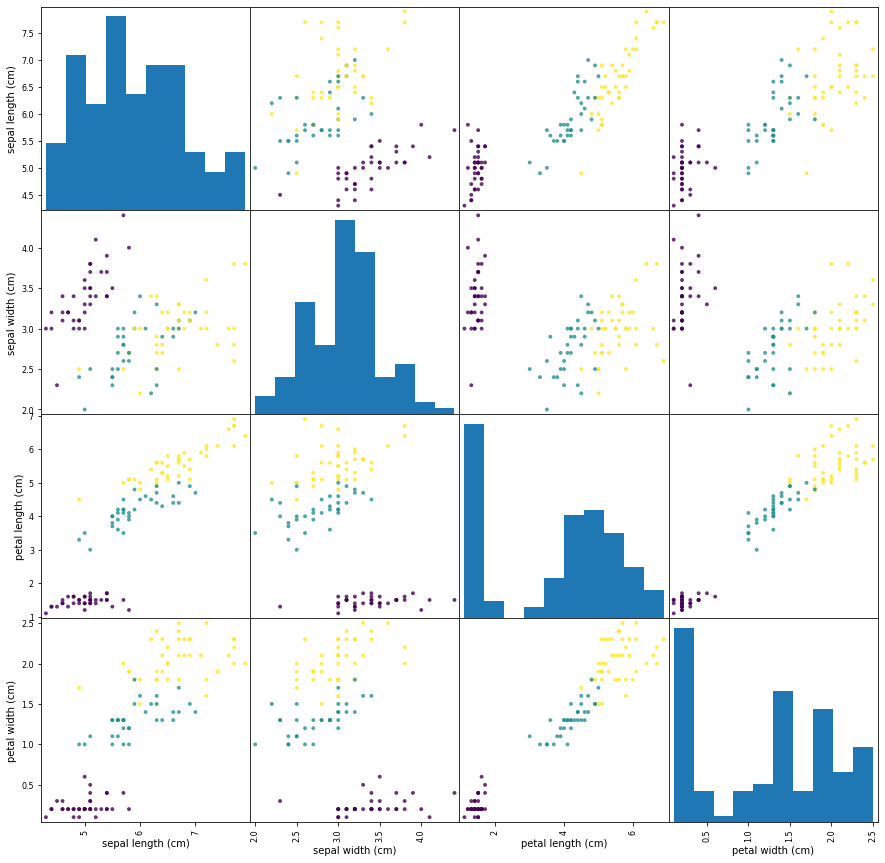

In [73]:
pd.plotting.scatter_matrix(iris_dataframe,c=y_train,figsize=(15,15),s=60,alpha=.8)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [75]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [78]:
X_new = np.array([[5,2.9,1,0.2]])
print(X_new.shape)

(1, 4)


In [79]:
prediction = knn.predict(X_new)
print(prediction)
print(iris_dataset['target_names'][prediction])

[0]
['setosa']


In [81]:
y_pred = knn.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [102]:
np.mean(y_pred == y_test)

0.9736842105263158

In [103]:
knn.score(X_test,y_test)

0.9736842105263158

In [111]:
print("{:.2f}".format(np.mean(y_pred == y_test)*100))

97.37
